# **PLS (Partial Least Square)를 이용한 Odor 분석**

---

In [ ]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
package_version(R.version)

[1] ‘4.1.1’


In [ ]:
%%R

.libPaths("/content/drive/MyDrive/R packages")
.libPaths()

[1] "/content/drive/MyDrive/R packages" "/usr/local/lib/R/site-library"    
[3] "/usr/lib/R/site-library"           "/usr/lib/R/library"               


## **0. Packages Installation**

In [ ]:
%%R

# install.packages("corrplot")                  
# install.packages("PerformanceAnalytics")      # 상관분석 시각화
# install.packages("pls")                       # pls
# install.packages("caret")         
# install.packages("mice")        # M.I 결측치 대체
# install.packages("stringr")
# install.packages("devtools")
# install.packages("lmtest")      # Durbin-Watson test (잔차의 독립성)
# install.packages("Boruta")
# install.packages("car")         # 다중공선성
# install.packages("Metrics")     # RMSE, MAPE

library(Metrics)
library(car)
library(lmtest)
library(devtools)
library(mice)
library(stringr)
library(corrplot)
library(PerformanceAnalytics)
library(pls)
library(caret)

**plsVarSel은  R version 4.0.5에서 지원하지 않으므로, Version을 지정해 다운해야된다.**

In [ ]:
%%R
# install_version("plsVarSel", version = "0.9.6", repos = "http://cran.us.r-project.org")    # VIP
library(plsVarSel)

## **I. Data**

### **1. Data Preparation**

#### **- Original (odor)**

In [ ]:
%%R

odor <- read.csv("drive/MyDrive/PLS_양돈 농가/New_data_preprocessed.csv", fileEncoding = "euc-kr")

head(odor)

    ou  nh3   h2s  mm.1    dms    aca     ppa    iba    bta    iva    vla    ph
1  300 0.56 145.0  0.09  12.80  30.60   17.57   2.78  10.80   3.64   7.72  2.84
2  300 0.62 310.0 19.40 462.00 916.52 1055.96 109.07 977.44 319.49 619.49 30.51
3  448 0.97  90.5  0.04  63.90 663.42  737.23  73.94 837.83 215.64 469.79 14.61
4 2080 1.02 344.0  0.04  13.00 490.79  570.61  51.09 719.27 168.48 237.64  8.90
5  310 1.18 312.0  0.04   0.04 404.53  468.03  43.17 573.75 157.22 205.67  9.21
6  669 0.98  61.4  0.04   0.04 349.63  347.86  36.76 582.25 127.25 196.24  7.19
      pc   id    sk
1   0.03 0.20  3.00
2 137.81 3.60 10.40
3  67.52 0.94  3.92
4  60.56 5.55  7.31
5  69.90 0.20  5.43
6  51.03 0.20  4.48


#### **- 결측값 확인 및 처리**

- 다른 파일 확인 or 추후 재생성

#### **- Log y (log_odor)**

In [ ]:
%%R

log_odor =log(odor)
head(log_odor)

        ou         nh3      h2s      mm.1       dms      aca      ppa      iba
1 5.703782 -0.57981850 4.976734 -2.407946  2.549445 3.421000 2.866193 1.022451
2 5.703782 -0.47803580 5.736572  2.965273  6.135565 6.820584 6.962206 4.691990
3 6.104793 -0.03045921 4.505350 -3.218876  4.157319 6.497408 6.602900 4.303254
4 7.640123  0.01980263 5.840642 -3.218876  2.564949 6.196016 6.346706 3.933589
5 5.736572  0.16551444 5.743003 -3.218876 -3.218876 6.002726 6.148532 3.765146
6 6.505784 -0.02020271 4.117410 -3.218876 -3.218876 5.856875 5.851800 3.604410
       bta      iva      vla       ph        pc         id       sk
1 2.379546 1.291984 2.043814 1.043804 -3.506558 -1.6094379 1.098612
2 6.884937 5.766726 6.428897 3.418054  4.925876  1.2809338 2.341806
3 6.730815 5.373610 6.152286 2.681706  4.212424 -0.0618754 1.366092
4 6.578237 5.126817 5.470757 2.186051  4.103635  1.7137979 1.989243
5 6.352194 5.057646 5.326273 2.220290  4.247066 -1.6094379 1.691939
6 6.366900 4.846154 5.279338 1.972691  

### **2. Data Visualizations**

#### **- Response variable**

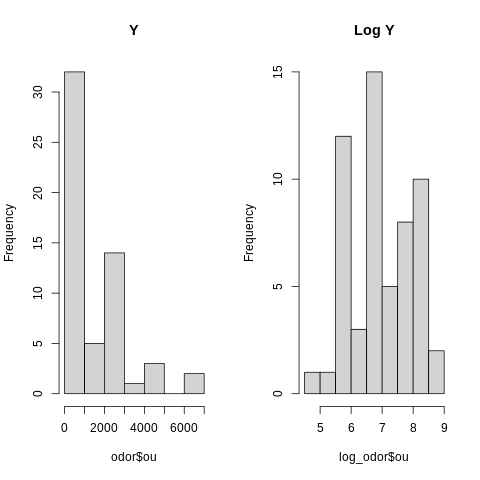

In [ ]:
%%R

par(mfrow = c(1,2))
hist(odor$ou, main="Y")
hist(log_odor$ou, main="Log Y")
par(mfrow = c(1,1))

#### **- Explanatory variables**

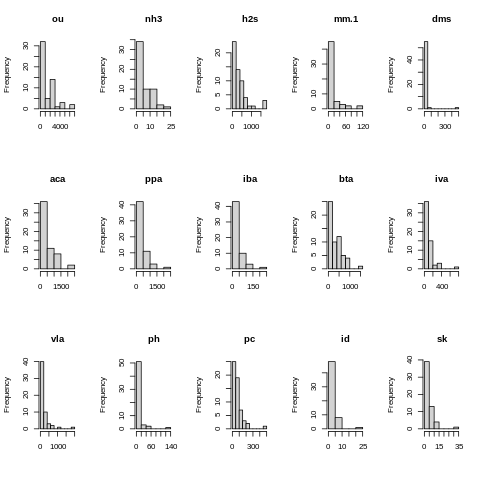

In [ ]:
%%R

par(mfrow = c(3, 5))
for (i in 1:dim(odor)[2]){
    hist(odor[1:dim(odor)[1], i], main = names(odor[i]), xlab = "")
}
par(mfrow = c(1, 1))

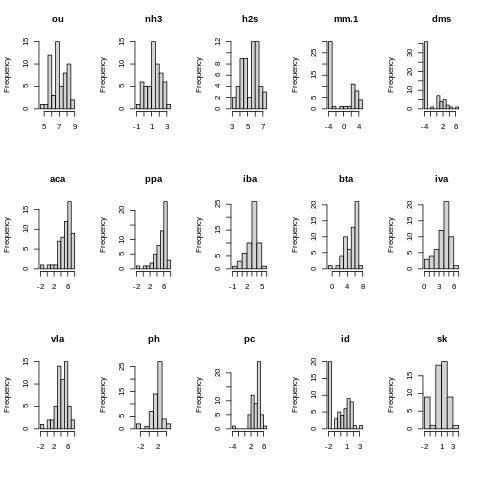

In [ ]:
%%R

par(mfrow = c(3, 5))
for (i in 1:dim(log_odor)[2]){
    hist(log_odor[1:dim(log_odor)[1], i], main = names(log_odor[i]), xlab = "")
}
par(mfrow = c(1, 1))

#### **- Boxplots**

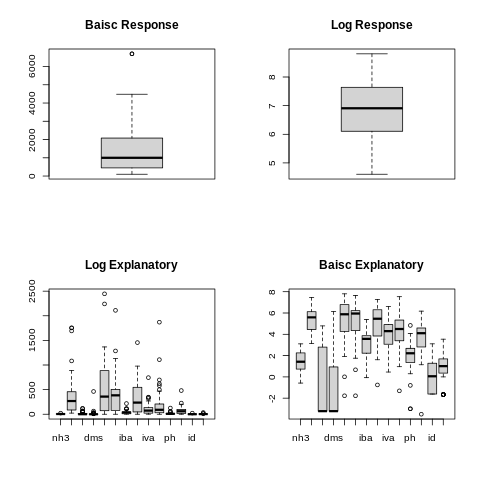

In [ ]:
%%R

par(mfrow = c(2,2))
boxplot(odor[1], main = "Baisc Response")
boxplot(log_odor[1], main = "Log Response")

boxplot(odor[2:dim(odor)[2]], main = "Log Explanatory")
boxplot(log_odor[2:dim(log_odor)[2]], main = "Baisc Explanatory")

par(mfrow = c(1,1))

### **3. Correlation**

#### **- Hitmap**

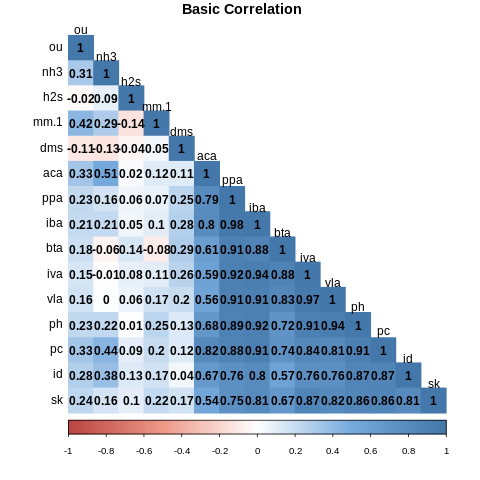

In [ ]:
%%R

basic_corr <- cor(odor, method = "pearson")

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot::corrplot(basic_corr, method = "color", col = col(200), order = "original", 
                   tl.col = "black", tl.srt = 0, 
                   type = "lower", 
                   addCoef.col = "black",
                   main = "\n Basic Correlation")

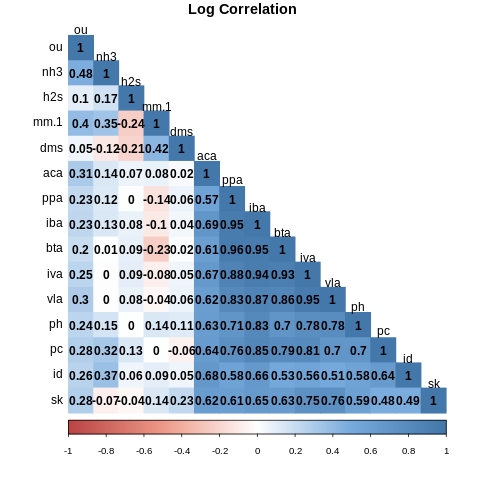

In [ ]:
%%R

log_corr <- cor(log_odor, method = "pearson")

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot::corrplot(log_corr, method = "color", col = col(200), order = "original", 
                   tl.col = "black", tl.srt = 0, 
                   type = "lower", 
                   addCoef.col = "black",
                   main = "\n Log Correlation")

#### **- Correlation**

Basic Max correlation 0.4211398
Log Max correlation 0.4784458

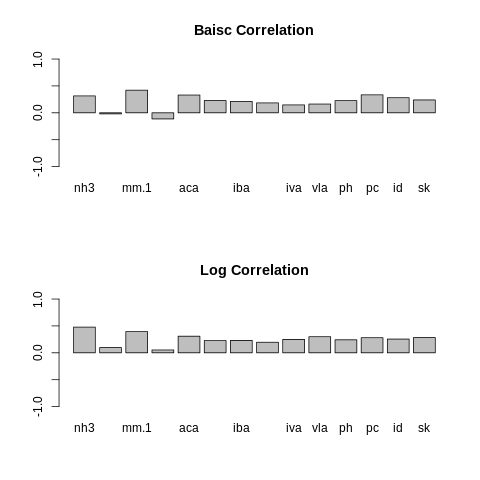

In [ ]:
%%R

cat("Basic Max correlation", max(basic_corr[2:dim(odor)[2], 1]))
cat("\nLog Max correlation", max(log_corr[2:dim(odor)[2], 1]))

par(mfrow = c(2, 1))
barplot(basic_corr[2:dim(odor)[2], 1],
        ylim = c(-1, 1), main = "Baisc Correlation")


barplot(log_corr[2:dim(odor)[2], 1],
        ylim = c(-1, 1), main = "Log Correlation")

par(mfrow = c(1, 1))

### **4. 다중 공선성 확인**

In [ ]:
%%R

basic_mr <- lm(ou ~ ., data = odor)
basic_vif <- vif(basic_mr)
cat("Basic VIF\n\n")
print(round(basic_vif, 3))

log_mr <- lm(ou ~ ., data = log_odor)
log_vif <- vif(log_mr)
cat("\n\nLog VIF\n\n")
print(round(log_vif, 3))

Basic VIF

    nh3     h2s    mm.1     dms     aca     ppa     iba     bta     iva     vla 
  4.831   1.270   1.554   1.582  11.161  88.301 158.295  24.485 120.712  48.704 
     ph      pc      id      sk 
 46.127  33.085   6.226  10.657 


Log VIF

   nh3    h2s   mm.1    dms    aca    ppa    iba    bta    iva    vla     ph 
 2.590  1.394  2.593  1.538  2.940 31.452 71.838 33.268 52.147 19.398  6.731 
    pc     id     sk 
 6.966  3.132  3.521 


Baisc VIF 10 이상 개수 :  ( 9 개) dms aca ppa iba bta iva vla ph id

Log VIF 10 이상 개수 :  ( 5 개) aca ppa iba bta iva

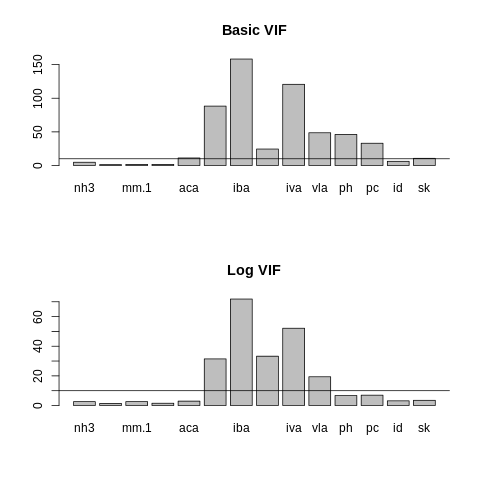

In [ ]:
%%R

par(mfrow = c(2,1))
barplot(basic_vif, main = "Basic VIF")
abline(h = 10)

barplot(log_vif, main = "Log VIF")
abline(h = 10)
par(mfrow = c(1,1))

cat("Baisc VIF 10 이상 개수 : ", "(", sum(basic_vif > 10), "개)", names(odor[basic_vif > 10]))
cat("\n\nLog VIF 10 이상 개수 : ", "(", sum(log_vif > 10), "개)", names(odor[log_vif > 10]))

## **II. Variables Extraction**

### **0. Standardization**

In [ ]:
%%R

st_odor <- as.data.frame(scale(odor, center = T, scale = T))
log_st_odor <- as.data.frame(scale(log_odor, center = T, scale = T))

print(head(st_odor))
print(head(log_st_odor))

          ou        nh3         h2s       mm.1         dms         aca
1 -0.8411369 -1.0345165 -0.54687788 -0.5460465  0.01317853 -0.91595123
2 -0.8411369 -1.0228805 -0.13601504  0.1935757  7.31208325  0.69853283
3 -0.7438537 -0.9550038 -0.68258712 -0.5479616  0.84348581  0.23728812
4  0.3288898 -0.9453071 -0.05135239 -0.5479616  0.01642827 -0.07730957
5 -0.8345637 -0.9142777 -0.13103489 -0.5479616 -0.19415456 -0.23450818
6 -0.5985864 -0.9530644 -0.75504839 -0.5479616 -0.19415456 -0.33455692
         ppa         iba        bta        iva         vla         ph
1 -0.9999332 -0.96213542 -1.0319491 -0.7857508 -0.60131023 -0.5477727
2  1.7245789  1.91478326  2.0112695  1.8033594  1.40080787  0.9227162
3  0.8882999  0.96393037  1.5717432  0.9520721  0.91088996  0.0777298
4  0.4511248  0.34545646  1.1984874  0.5654885  0.15114084 -0.2257213
5  0.1819770  0.13108826  0.7403549  0.4731871  0.04651375 -0.2092467
6 -0.1333233 -0.04240923  0.7671150  0.2275147  0.01565252 -0.3165972
           pc

#### **- Histogram**

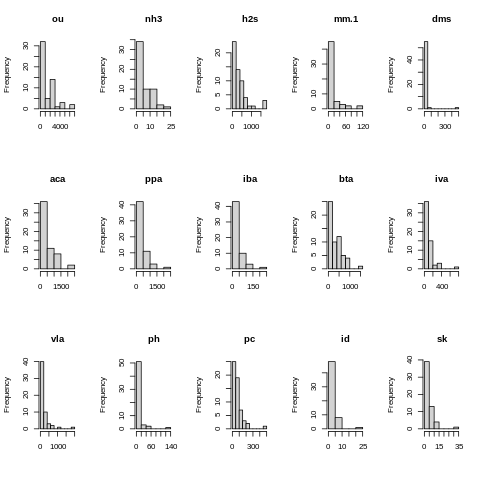

In [ ]:
%%R

par(mfrow = c(3, 5))
for (i in 1:dim(st_odor)[2]){
    hist(odor[1:dim(st_odor)[1], i], main = names(st_odor[i]), xlab = "")
}
par(mfrow = c(1, 1))

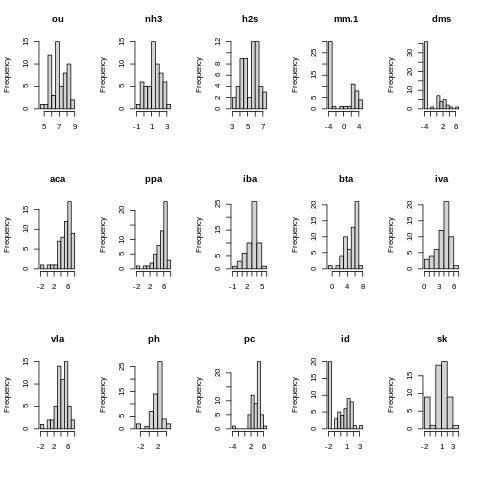

In [ ]:
%%R

par(mfrow = c(3, 5))
for (i in 1:dim(log_st_odor)[2]){
    hist(log_odor[1:dim(log_st_odor)[1], i], main = names(log_st_odor[i]), xlab = "")
}
par(mfrow = c(1, 1))

#### **- Boxplots**

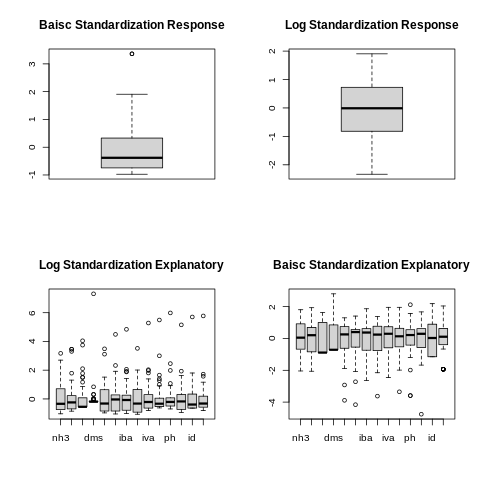

In [ ]:
%%R

par(mfrow = c(2,2))
boxplot(st_odor[1], main = "Baisc Standardization Response")
boxplot(log_st_odor[1], main = "Log Standardization Response")

boxplot(st_odor[2:dim(st_odor)[2]], main = "Log Standardization Explanatory")
boxplot(log_st_odor[2:dim(log_st_odor)[2]], main = "Baisc Standardization Explanatory")

par(mfrow = c(1,1))

### **1. PLS (basic_pls, log_pls)**

#### **- PLSR**

In [ ]:
%%R

### Validation method : Leave-One-Out
pr <- plsr(ou ~ ., data = st_odor, ncomp = ncol(st_odor)-1, validation = "LOO")               # 기본
log_pr <- plsr(ou ~ ., data = log_st_odor, ncomp = ncol(log_st_odor)-1, validation = "LOO")   # Log

#### **- Best Components**

Basic :  2 
Log :  4

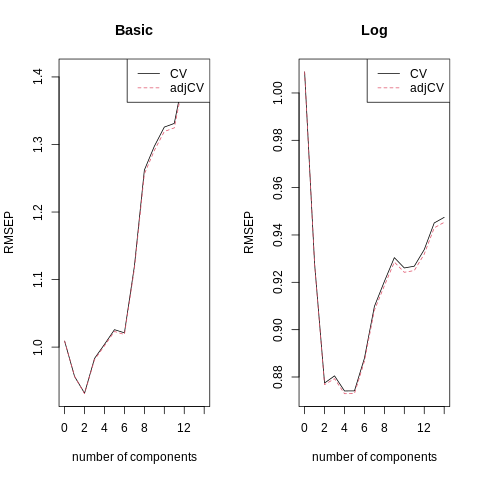

In [ ]:
%%R

par(mfrow = c(1,2))
plot(RMSEP(pr), legendpos = "topright", main = "Basic")
plot(RMSEP(log_pr), legendpos = "topright", main = "Log")
par(mfrow = c(1,1))

# 최적의 ncomp 수 
ocom = which.min(pr$validation$PRESS)
log_ocom = which.min(log_pr$validation$PRESS)

cat("Basic : ", ocom, "\n")
cat("Log : ", log_ocom)

#### **- PLSR from best comp**

In [ ]:
%%R

best_pr <- plsr(ou ~ ., data = st_odor, ncomp = ocom, validation = "LOO")               # 기본
best_log_pr <- plsr(ou ~ ., data = log_st_odor, ncomp = log_ocom, validation = "LOO")   # Log

#### **- PLS Dataset**

In [ ]:
%%R

# Basic PLS
om <- matrix(as.numeric(best_pr$scores), ncol = ncol(best_pr$scores))
basic_pls <- cbind(odor["ou"], om)
colnames(basic_pls) <- c("ou", colnames(best_pr$scores))

# Log PLs
log_om <- matrix(as.numeric(best_log_pr$scores), ncol = ncol(best_log_pr$scores))
log_pls <- cbind(log_odor["ou"], log_om)
colnames(log_pls) <- c("ou", colnames(best_log_pr$scores))


print(head(basic_pls))
print(head(log_pls))

    ou     Comp 1     Comp 2
1  300 -2.5275350 -0.5366195
2  300  1.7825187 -4.3203728
3  448  0.3166238 -1.9364396
4 2080  0.2413298 -1.2312705
5  310 -0.5199269 -1.0955164
6  669 -0.8671562 -0.9684017
        ou      Comp 1     Comp 2     Comp 3    Comp 4
1 5.703782 -4.99646207 -0.9794808 -0.2916785 1.7928877
2 5.703782  2.34649105 -1.3392847 -1.2314638 0.8125596
3 6.104793  0.67874793 -2.4262806 -0.8104323 1.2657808
4 7.640123  0.79578265 -2.0657481 -0.8818572 0.0700123
5 5.736572 -0.01595306 -1.9368721  0.9957053 0.2184322
6 6.505784 -0.51936323 -2.2478120  0.6051729 1.0958428


#### **- VIF**

In [ ]:
%%R

basic_pls_mr <- lm(ou ~ ., data = basic_pls)
basic_pls_vif <- vif(basic_pls_mr)
cat("Basic PLS VIF\n")
print(round(basic_pls_vif, 3))

log_pls_mr <- lm(ou ~ ., data = log_pls)
log_pls_vif <- vif(log_pls_mr)
cat("\nLog PLS VIF\n")
print(round(log_pls_vif, 3))

Basic PLS VIF
`Comp 1` `Comp 2` 
       1        1 

Log PLS VIF
`Comp 1` `Comp 2` `Comp 3` `Comp 4` 
       1        1        1        1 


### **2. PCA (basic_pca, log_pca)**

#### **- PCR**

In [ ]:
%%R

pcr <- prcomp(st_odor[,2 : ncol(st_odor)])
log_pcr <- prcomp(log_st_odor[,2 : ncol(log_st_odor)])

#### **- Best Components**

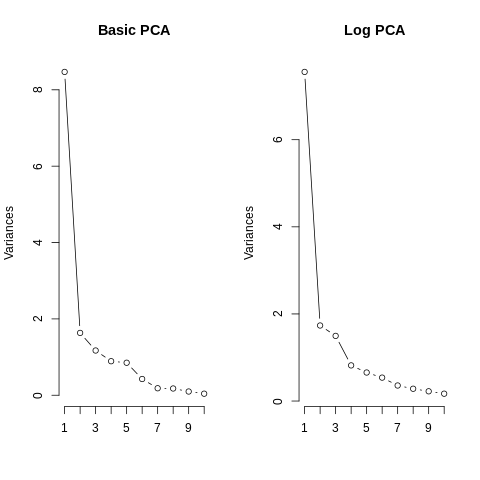

In [ ]:
%%R

par(mfrow = c(1, 2))
plot(pcr, type="l", main = "Basic PCA") #, xlab = "Components")
plot(log_pcr, type="l", main = "Log PCA") #, xlab = "Components")
par(mfrow = c(1, 1))

In [ ]:
%%R

### 누적 설명력이 85이 넘는 첫 PC 위치
basic_pca_ocomp <- which(summary(pcr)$importance[3,] > 0.85)[1] 
log_pca_ocomp <- which(summary(log_pcr)$importance[3,] > 0.85)[1] 

cat("Basic : ", basic_pca_ocomp)
cat("\nLog : ", log_pca_ocomp)

Basic :  4
Log :  5

#### **- PCA Dataset**

In [ ]:
%%R

pcr_x <- as.matrix(st_odor[, 2:ncol(st_odor)]) %*% as.matrix(pcr$rotation)
basic_pca <- cbind(odor["ou"], pcr_x[, 1:basic_pca_ocomp])


log_pcr_x <- as.matrix(log_st_odor[, 2:ncol(log_st_odor)]) %*% as.matrix(log_pcr$rotation)
log_pca <- cbind(log_odor["ou"], log_pcr_x[, 1:log_pca_ocomp])


print(head(basic_pca))
print(head(log_pca))

    ou         PC1       PC2        PC3        PC4
1  300 -2.54492327 0.7492015 -0.4001538 -0.4714886
2  300  4.52003630 4.0027429 -2.8389760  5.1705092
3  448  1.51454909 2.0681227 -0.5651447  0.3230466
4 2080  1.01827492 1.2918586  0.2936663 -0.4136312
5  310  0.07930694 1.2978770  0.1430277 -0.4268885
6  669 -0.38290024 1.3013028 -0.3067874 -0.5417673
        ou        PC1        PC2       PC3        PC4        PC5
1 5.703782 -5.0593768 -0.5453653 -2.963410 -1.2729998 -1.1413075
2 5.703782  3.3990958 -1.6286980 -2.261544 -1.7999313  0.3104919
3 6.104793  2.2044067 -0.1920240 -2.544499 -0.3108546  0.5811219
4 7.640123  2.1151003  0.2685628 -1.553404 -1.0781644 -0.2480881
5 5.736572  1.2208645  1.6543745 -1.340849 -0.2098386 -0.0510329
6 6.505784  0.8198263  1.1830119 -2.009846  1.0056236 -0.1619172


#### **- VIF**

In [ ]:
%%R

basic_pca_mr <- lm(ou ~ ., data = basic_pca)
basic_pca_vif <- vif(basic_pca_mr)
cat("Basic PCA VIF\n")
print(round(basic_pca_vif, 3))

log_pca_mr <- lm(ou ~ ., data = log_pca)
log_pca_vif <- vif(log_pca_mr)
cat("\nLog PCA VIF\n")
print(round(log_pca_vif, 3))

Basic PCA VIF
PC1 PC2 PC3 PC4 
  1   1   1   1 

Log PCA VIF
PC1 PC2 PC3 PC4 PC5 
  1   1   1   1   1 


## **III. Regression**

### **1. PLS**

#### **1) Basic**

##### **- Summary**

In [ ]:
%%R

basic_pls_reg <- lm(ou ~ ., data = basic_pls)
summary(basic_pls_reg)


Call:
lm(formula = ou ~ ., data = basic_pls)

Residuals:
    Min      1Q  Median      3Q     Max 
-1702.0  -734.7  -317.4   408.0  5312.1 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1579.65     174.74   9.040 2.15e-12 ***
`Comp 1`      229.89      70.82   3.246  0.00201 ** 
`Comp 2`      406.80     129.07   3.152  0.00265 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1319 on 54 degrees of freedom
Multiple R-squared:  0.2749,	Adjusted R-squared:  0.248 
F-statistic: 10.24 on 2 and 54 DF,  p-value: 0.0001703



##### **- Correlation**

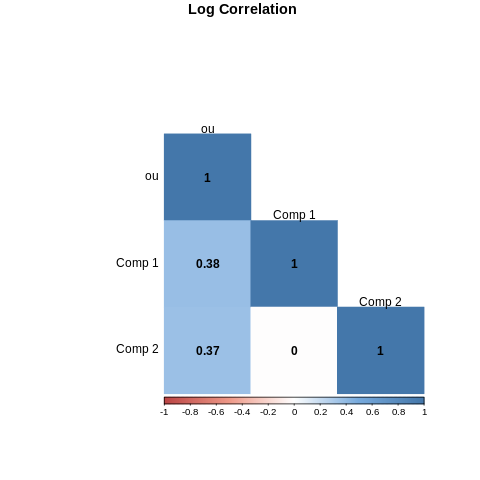

In [ ]:
%%R

basic_pls_corr <- cor(basic_pls, method = "pearson")

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot::corrplot(basic_pls_corr, method = "color", col = col(200), order = "original", 
                   tl.col = "black", tl.srt = 0, 
                   type = "lower", 
                   addCoef.col = "black",
                   main = "\n Log Correlation")

##### **- 가설 검정**

- 잔차의 정규성 (Shapiro-test)
  - $H_0$ : 모집단은 정규분포를 따른다.   vs   $H_1$ : 모집단은 정규분포를 따르지 않는다.

- 잔차의 독립성 (Durbin-Watson test)
  -  DW statistic 값이 2 근처의 값이 나오는 경우 자기상관관계가 없다. (= 독립)

- 잔차의 등분산성 (Breusch-Pagan test)
  - $H_0$ : 등분산성이다.  vs  $H_1$ : 등분산성이 아니다.

In [ ]:
%%R

### 등분산성
cat("잔차의 등분산성 (Breusch-Pagan Test) \n")
print(bptest(basic_pls_reg))


### 독립성
cat("\n잔차의 독립성 (Durbin-Watson Test) \n")
print(dwtest(basic_pls_reg))


### 정/규성
basic_pls_res <- residuals(basic_pls_reg)
cat("\n 정규성 (Shapiro) \n")
print(shapiro.test(basic_pls_res))

잔차의 등분산성 (Breusch-Pagan Test) 

	studentized Breusch-Pagan test

data:  basic_pls_reg
BP = 0.60499, df = 2, p-value = 0.739


잔차의 독립성 (Durbin-Watson Test) 

	Durbin-Watson test

data:  basic_pls_reg
DW = 1.7456, p-value = 0.1396
alternative hypothesis: true autocorrelation is greater than 0


 정규성 (Shapiro) 

	Shapiro-Wilk normality test

data:  basic_pls_res
W = 0.81113, p-value = 4.397e-07



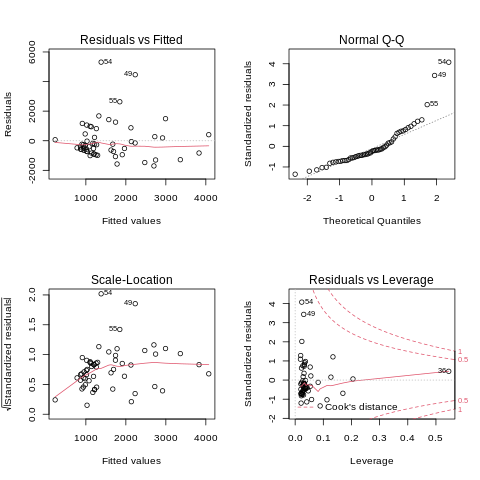

In [ ]:
%%R

par(mfrow=c(2,2))
plot(basic_pls_reg)
par(mfrow=c(1,1))

#### **2) Log**

##### **- Summary**

In [ ]:
%%R

log_pls_reg <- lm(ou ~ ., data = log_pls)
summary(log_pls_reg)


Call:
lm(formula = ou ~ ., data = log_pls)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67835 -0.50504 -0.07432  0.44206  2.00066 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.91951    0.10240  67.573  < 2e-16 ***
`Comp 1`     0.19147    0.04460   4.293 7.71e-05 ***
`Comp 2`     0.29261    0.07441   3.932  0.00025 ***
`Comp 3`     0.32466    0.14071   2.307  0.02505 *  
`Comp 4`     0.10964    0.10593   1.035  0.30545    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7731 on 52 degrees of freedom
Multiple R-squared:  0.4365,	Adjusted R-squared:  0.3932 
F-statistic: 10.07 on 4 and 52 DF,  p-value: 4.113e-06



##### **- Correlation**

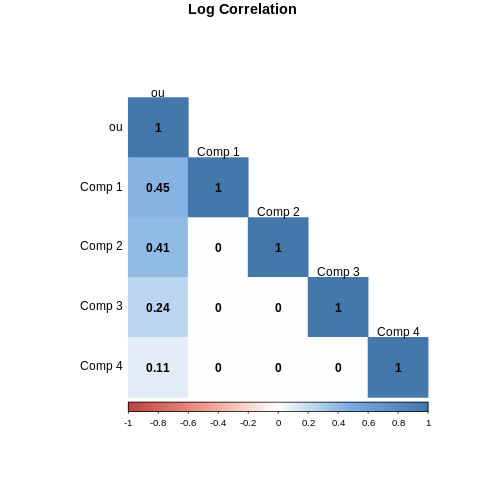

In [ ]:
%%R

log_pls_corr <- cor(log_pls, method = "pearson")

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot::corrplot(log_pls_corr, method = "color", col = col(200), order = "original", 
                   tl.col = "black", tl.srt = 0, 
                   type = "lower", 
                   addCoef.col = "black",
                   main = "\n Log Correlation")

##### **- 가설 검정**

In [ ]:
%%R

### 등분산성
cat("잔차의 등분산성 (Breusch-Pagan Test) \n")
print(bptest(log_pls_reg))


### 독립성
cat("\n잔차의 독립성 (Durbin-Watson Test) \n")
print(dwtest(log_pls_reg))


### 정/규성
log_pls_res <- residuals(log_pls_reg)
cat("\n 정규성 (Shapiro) \n")
print(shapiro.test(log_pls_res))

잔차의 등분산성 (Breusch-Pagan Test) 

	studentized Breusch-Pagan test

data:  log_pls_reg
BP = 7.8477, df = 4, p-value = 0.09732


잔차의 독립성 (Durbin-Watson Test) 

	Durbin-Watson test

data:  log_pls_reg
DW = 1.8201, p-value = 0.1665
alternative hypothesis: true autocorrelation is greater than 0


 정규성 (Shapiro) 

	Shapiro-Wilk normality test

data:  log_pls_res
W = 0.96845, p-value = 0.1421



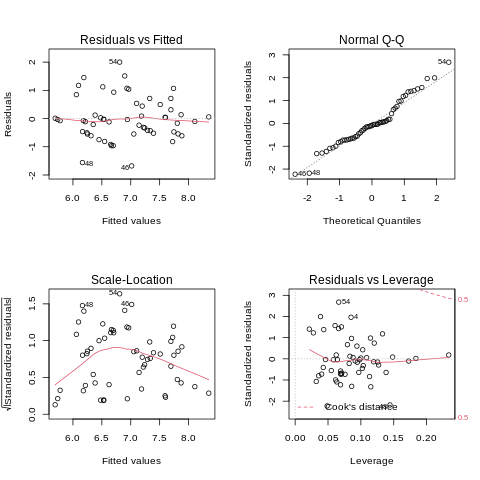

In [ ]:
%%R

par(mfrow=c(2,2))
plot(log_pls_reg)
par(mfrow=c(1,1))

### **2. PCA**

#### **1) Basic**

##### **- Summary**

In [ ]:
%%R

basic_pca_reg <- lm(ou ~ ., data = basic_pca)
summary(basic_pca_reg)


Call:
lm(formula = ou ~ ., data = basic_pca)

Residuals:
    Min      1Q  Median      3Q     Max 
-1630.9  -807.9  -491.0   348.2  5200.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1579.65     184.35   8.569 1.63e-11 ***
PC1           138.42      63.91   2.166  0.03494 *  
PC2          -444.40     145.54  -3.053  0.00356 ** 
PC3          -154.30     171.82  -0.898  0.37331    
PC4           -57.02     196.98  -0.289  0.77338    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1392 on 52 degrees of freedom
Multiple R-squared:  0.2228,	Adjusted R-squared:  0.163 
F-statistic: 3.726 on 4 and 52 DF,  p-value: 0.00969



##### **- Correlation**

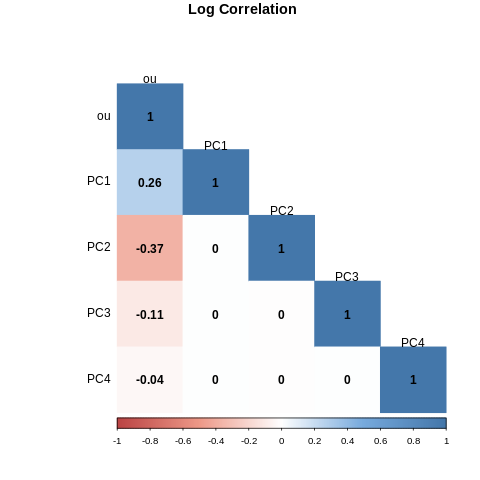

In [ ]:
%%R

basic_pca_corr <- cor(basic_pca, method = "pearson")

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot::corrplot(basic_pca_corr, method = "color", col = col(200), order = "original", 
                   tl.col = "black", tl.srt = 0, 
                   type = "lower", 
                   addCoef.col = "black",
                   main = "\n Log Correlation")

##### **- 가설 검정**

In [ ]:
%%R

### 등분산성
cat("잔차의 등분산성 (Breusch-Pagan Test) \n")
print(bptest(basic_pca_reg))


### 독립성
cat("\n잔차의 독립성 (Durbin-Watson Test) \n")
print(dwtest(basic_pca_reg))


### 정/규성
basic_pca_res <- residuals(basic_pca_reg)
cat("\n 정규성 (Shapiro) \n")
print(shapiro.test(basic_pca_res))

잔차의 등분산성 (Breusch-Pagan Test) 

	studentized Breusch-Pagan test

data:  basic_pca_reg
BP = 0.60014, df = 4, p-value = 0.963


잔차의 독립성 (Durbin-Watson Test) 

	Durbin-Watson test

data:  basic_pca_reg
DW = 1.6911, p-value = 0.07978
alternative hypothesis: true autocorrelation is greater than 0


 정규성 (Shapiro) 

	Shapiro-Wilk normality test

data:  basic_pca_res
W = 0.80931, p-value = 3.959e-07



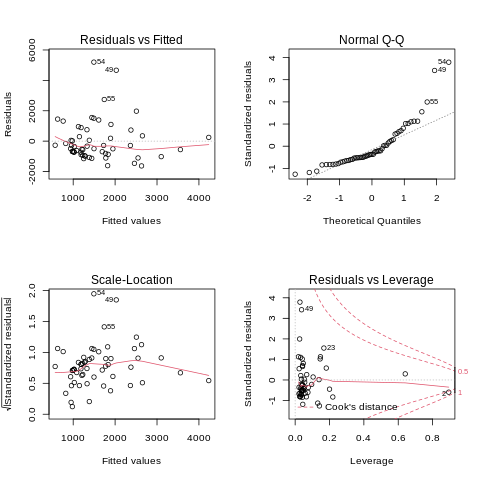

In [ ]:
%%R

par(mfrow=c(2,2))
plot(basic_pca_reg)
par(mfrow=c(1,1))

#### **2) Log**

##### **- Summary**

In [ ]:
%%R

log_pca_reg <- lm(ou ~ ., data = log_pca)
summary(log_pca_reg)


Call:
lm(formula = ou ~ ., data = log_pca)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.07486 -0.58566 -0.03917  0.73293  1.67370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.91951    0.11505  60.144  < 2e-16 ***
PC1          0.10893    0.04222   2.580  0.01281 *  
PC2         -0.22634    0.08814  -2.568  0.01320 *  
PC3          0.27226    0.09490   2.869  0.00598 ** 
PC4         -0.09927    0.12832  -0.774  0.44272    
PC5          0.02523    0.14344   0.176  0.86109    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8686 on 51 degrees of freedom
Multiple R-squared:  0.3024,	Adjusted R-squared:  0.234 
F-statistic: 4.422 on 5 and 51 DF,  p-value: 0.002019



##### **- Correlation**

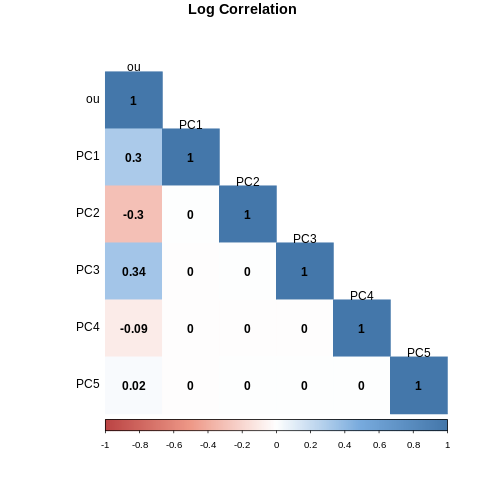

In [ ]:
%%R

log_pca_corr <- cor(log_pca, method = "pearson")

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot::corrplot(log_pca_corr, method = "color", col = col(200), order = "original", 
                   tl.col = "black", tl.srt = 0, 
                   type = "lower", 
                   addCoef.col = "black",
                   main = "\n Log Correlation")

##### **- 가설 검정**

In [ ]:
%%R

### 등분산성
cat("잔차의 등분산성 (Breusch-Pagan Test) \n")
print(bptest(log_pca_reg))


### 독립성
cat("\n잔차의 독립성 (Durbin-Watson Test) \n")
print(dwtest(log_pca_reg))


### 정/규성
log_pca_res <- residuals(log_pca_reg)
cat("\n 정규성 (Shapiro) \n")
print(shapiro.test(log_pca_res))

잔차의 등분산성 (Breusch-Pagan Test) 

	studentized Breusch-Pagan test

data:  log_pca_reg
BP = 3.2946, df = 5, p-value = 0.6547


잔차의 독립성 (Durbin-Watson Test) 

	Durbin-Watson test

data:  log_pca_reg
DW = 1.6998, p-value = 0.08953
alternative hypothesis: true autocorrelation is greater than 0


 정규성 (Shapiro) 

	Shapiro-Wilk normality test

data:  log_pca_res
W = 0.9796, p-value = 0.4469



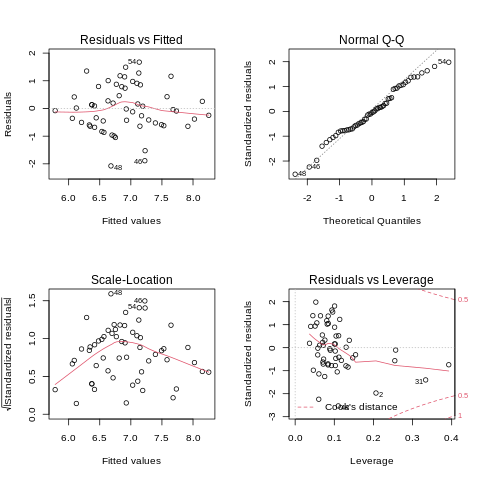

In [ ]:
%%R

par(mfrow=c(2,2))
plot(log_pca_reg)
par(mfrow=c(1,1))

## **IV. Result**

### **1. Function reg_loocv**

In [ ]:
%%R

reg_loocv <- function(data) {
                  
                  predict <- rep(0, nrow(data))
                  real <- rep(0, nrow(data))

                  for (i in 1 : nrow(data)) {
                      train <- data[-i, 1:ncol(data)]
                      test <- data[i, 1:ncol(data)]

                      test_y = test[1:nrow(test), 1]
                      test_X = test[1:nrow(test), 2:ncol(test)]

                      reg_fit = lm(ou ~ . , data = train)

                      predict[i] = predict(reg_fit, newdata = test_X)
                      real[i] = test_y
                  }
                  return (list(predict = predict, real = real))
              }

In [ ]:
%%R

pls_result <- reg_loocv(data = basic_pls)
pls_pred <- pls_result$predict  ; pls_real <- pls_result$real

log_pls_result <- reg_loocv(data = log_pls)
log_pls_pred <- log_pls_result$predict  ; log_pls_real <- log_pls_result$real

pca_result <- reg_loocv(data = basic_pca)
pca_pred <- pca_result$predict  ; pca_real <- pca_result$real

log_pca_result <- reg_loocv(data = log_pca)
log_pca_pred <- log_pca_result$predict  ; log_pca_real <- log_pca_result$real

### **2. Results**

#### **- DataFrame**

In [ ]:
%%R

pls_result_value <- as.data.frame(cbind(real = pls_real, pred = pls_pred, diff= pls_real-pls_pred))
log_pls_result_value <- as.data.frame(cbind(real = log_pls_real, pred = log_pls_pred, diff = log_pls_real-log_pls_pred))
exp_log_pls_result_value <- as.data.frame(cbind(real = exp(log_pls_real), pred = exp(log_pls_pred), diff = exp(log_pls_real)-exp(log_pls_pred)))
pca_result_value <- as.data.frame(cbind(real = pca_real, pred = pca_pred, diff= pca_real-pca_pred))
log_pca_result_value <- as.data.frame(cbind(real = log_pca_real, pred = log_pca_pred, diff = log_pca_real-log_pca_pred))
exp_log_pca_result_value <- as.data.frame(cbind(real = exp(log_pca_real), pred = exp(log_pca_pred), diff = exp(log_pca_real)-exp(log_pca_pred)))

print(head(pls_result_value))
print(head(log_pls_result_value))
print(head(exp_log_pls_result_value))
print(head(pca_result_value))
print(head(log_pca_result_value))
print(head(exp_log_pca_result_value))

  real      pred       diff
1  300  799.6526 -499.65255
2  300  214.3102   85.68978
3  448  888.3555 -440.35548
4 2080 1102.7606  977.23944
5  310 1036.1181 -726.11814
6  669  995.7324 -326.73237
      real     pred        diff
1 5.703782 5.793617 -0.08983427
2 5.703782 6.791400 -1.08761759
3 6.104793 6.231018 -0.12622474
4 7.640123 6.053898  1.58622545
5 5.736572 6.787325 -1.05075259
6 6.505784 6.475979  0.02980550
  real     pred       diff
1  300 328.1979  -28.19789
2  300 890.1590 -590.15897
3  448 508.2726  -60.27263
4 2080 425.7693 1654.23067
5  310 886.5388 -576.53879
6  669 649.3544   19.64565
  real      pred       diff
1  300 1014.6723  -714.6723
2  300 2847.2645 -2547.2645
3  448  979.4408  -531.4408
4 2080 1082.1366   997.8634
5  310 1045.4925  -735.4925
6  669 1042.9066  -373.9066
      real     pred       diff
1 5.703782 5.809859 -0.1060761
2 5.703782 7.626256 -1.9224737
3 6.104793 6.616199 -0.5114055
4 7.640123 6.686149  0.9539739
5 5.736572 6.378593 -0.6420212
6 6.50578

#### **- Plots**

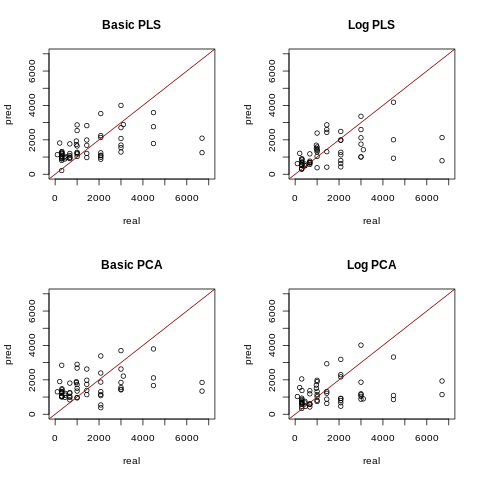

In [ ]:
%%R

par(mfrow = c(2, 2))
plot(pls_real, pls_pred, 
     xlim = c(0,7000), ylim = c(0,7000), 
     xlab = "real", ylab = "pred", main = "Basic PLS")
abline(a = 1, b = 1, col = "darkred")

plot(exp(log_pls_real), exp(log_pls_pred), 
     xlim = c(0,7000), ylim = c(0,7000), 
     xlab = "real", ylab = "pred", main = "Log PLS")
abline(a = 1, b = 1, col = "darkred")

plot(pca_real, pca_pred, 
     xlim = c(0,7000), ylim = c(0,7000), 
     xlab = "real", ylab = "pred", main = "Basic PCA")
abline(a = 1, b = 1, col = "darkred")

plot(exp(log_pca_real), exp(log_pca_pred), 
     xlim = c(0,7000), ylim = c(0,7000), 
     xlab = "real", ylab = "pred", main = "Log PCA")
abline(a = 1, b = 1, col = "darkred")
par(mfrow = c(1 ,1))

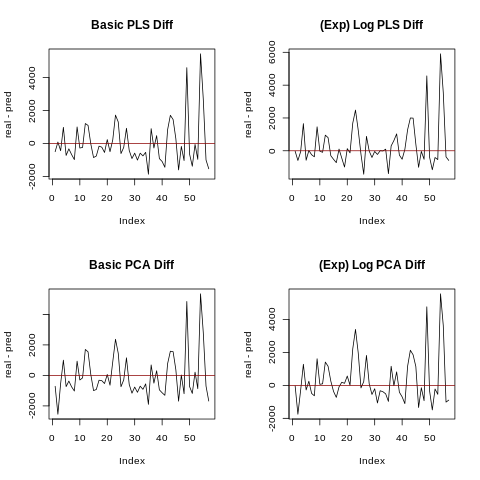

In [ ]:
%%R

par(mfrow = c(2, 2))
plot(pls_result_value$diff, type = "l", 
     main = "Basic PLS Diff", ylab = "real - pred")
abline(h = 0, col = "darkred")

plot(exp_log_pls_result_value$diff, type = "l", 
     main = "(Exp) Log PLS Diff", ylab = "real - pred")
abline(h = 0, col = "darkred")

plot(pca_result_value$diff, type = "l", 
     main = "Basic PCA Diff", ylab = "real - pred")
abline(h = 0, col = "darkred")

plot(exp_log_pca_result_value$diff, type = "l", 
     main = "(Exp) Log PCA Diff", ylab = "real - pred")
abline(h = 0, col = "darkred")
par(mfrow = c(1, 1))

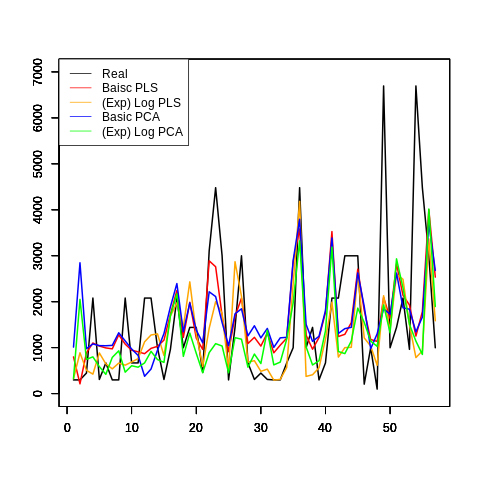

In [ ]:
%%R

plot(pls_real, type = "l", col = "black", ylim = c(0, 7000), lwd = 2, xlab = "", ylab = "")
par(new = T) ; plot(pls_pred, type = "l", col = "red", ylim = c(0, 7000), lwd = 2, xlab = "", ylab = "")
par(new = T) ; plot(exp(log_pls_pred), type = "l", col = "orange", ylim = c(0, 7000), lwd = 2, xlab = "", ylab = "")
par(new = T) ; plot(pca_pred, type = "l", col = "blue", ylim = c(0, 7000), lwd = 2, xlab = "", ylab = "")
par(new = T) ; plot(exp(log_pca_pred), type = "l", col = "green", ylim = c(0, 7000), lwd = 2, xlab = "", ylab = "")
legend("topleft", legend = c("Real", "Baisc PLS", "(Exp) Log PLS", "Basic PCA", "(Exp) Log PCA"), lty = 1, col = c("black", "red", "orange", "blue", "green"))


#### **- Finals**

In [ ]:
%%R

real <- odor$ou

### R2
basic_pls_r2 <- round(cor(real, pls_pred)^2, 3)
exp_log_pls_r2 <- round(cor(real, exp(log_pls_pred))^2, 3)
basic_pca_r2 <- round(cor(real, pca_pred)^2, 3)
exp_log_pca_r2 <- round(cor(real, exp(log_pca_pred))^2, 3)

r2_result <- c(basic_pls_r2, exp_log_pls_r2, basic_pca_r2, exp_log_pca_r2)


### RMSE
basic_pls_rmse <- round(rmse(real, pls_pred), 3)
exp_log_pls_rmse <- round(rmse(real, exp(log_pls_pred)), 3)
basic_pca_rmse <- round(rmse(real, pca_pred), 3)
exp_log_pca_rmse <- round(rmse(real, exp(log_pca_pred)), 3)

rmse_result <- c(basic_pls_rmse, exp_log_pls_rmse, basic_pca_rmse, exp_log_pca_rmse)

### MAPE
basic_pls_mae <- round(mae(real, pls_pred), 3)
exp_log_pls_mae <- round(mae(real, exp(log_pls_pred)), 3)
basic_pca_mae <- round(mae(real, pca_pred), 3)
exp_log_pca_mae <- round(mae(real, exp(log_pca_pred)), 3)

mae_result <- c(basic_pls_mae, exp_log_pls_mae, basic_pca_mae, exp_log_pca_mae)

In [ ]:
%%R

results <- rbind(r2_result, rmse_result, mae_result)
colnames(results) <- c("Baisc PLS", "(Exp) Log PLS", "Basic PCA", "(Exp) Log PCA")
rownames(results) <- c("R2", "RMSE", "MAE")

results

     Baisc PLS (Exp) Log PLS Basic PCA (Exp) Log PCA
R2       0.218         0.217     0.103         0.107
RMSE  1335.840      1380.840  1448.854      1496.137
MAE    949.094       839.580  1075.079       998.556
